## Тексты

<center>
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" width="800">


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
import torch.nn.functional as F

from tqdm.notebook import tqdm

In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

#### Описание данных

[Данные](https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing)



In [ ]:
import gdown

url = "https://drive.google.com/drive/folders/1yfM_snPE4Z_wXJIx_l7rcUV5M4PXZn7V?usp=drive_link"
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/hw4_iad/Copy of ria_news.tsv',
 '/content/hw4_iad/Copy of vk_comments.tsv',
 '/content/hw4_iad/Copy of vk_news.tsv']

В таблице `ria_news.tsv`  лежат данные о новостях, вышедших на сайте РИА-НОВОСТИ с 15 марта 2018 года по 31 декабря 2018 года.

- `href` - уникальный идентификатор новости (ссылка на неё)
- `date` - дата публикации новости
- `time` - время публикации новости
- `title` - заголовок новости
- `snippet` - краткое описание новости
- `text` - текст новости
- `category` - категория новости
- `keywords` - ключевые слова (подкатегории новости)
- `shows` - счётчик с числом просмотров новости на сайте (на момент парсинга)

In [ ]:
df_ria = pd.read_csv('/content/hw4_iad/Copy of ria_news.tsv', sep='\t')
df_ria = df_ria[~df_ria.tags.isnull()]
print(df_ria.shape)
df_ria.head()

(201708, 9)


,href,date,time,title,snippet,text,category,tags,shows
0,/20181231/1548961410.html,2018-12-31,"31 декабря 2018, 23:52",Нетаньяху не собирается в отставку в случае пр...,Премьер-министр Израиля Биньямин Нетаньяху не ...,"МОСКВА, 31 дек - РИА Новости. Премьер-министр ...",В мире,"Биньямин Нетаньяху, Израиль, В мире",728.0
1,/20181231/1548961364.html,2018-12-31,"31 декабря 2018, 23:19",Макрон в новогоднем обращении затронул тему ре...,"Результат реформ не может быть мгновенным, зая...","ПАРИЖ, 31 дек – РИА Новости. Результат реформ ...",В мире,"Эммануэль Макрон, Франция, В мире",3086.0
2,/20181231/1548961337.html,2018-12-31,"31 декабря 2018, 23:12",Аарон Рэмзи проведет переговоры с пятью топ-кл...,"Полузащитник лондонского ""Арсенала"" Аарон Рэмз...","МОСКВА, 31 дек - РИА Новости. Полузащитник лон...",NaN,ФК Арсенал (Лондон),183.0
3,/20181231/1548961304.html,2018-12-31,"31 декабря 2018, 23:09",Гол Азмуна принес сборной Ирана победу над кат...,Футболисты сборной Ирана одержали победу над к...,"МОСКВА, 31 дек - РИА Новости. Футболисты сборн...",NaN,"Сердар Азмун, Сборная Ирана по футболу",78.0
4,/20181231/1548961265.html,2018-12-31,"31 декабря 2018, 23:07",Пятая ракетка мира дель Потро пропустит Открыт...,Аргентинский теннисист Хуан Мартин дель Потро ...,"МОСКВА, 31 дек - РИА Новости. Аргентинский тен...",NaN,Теннис,79.0


In [ ]:
df_ria["category"].unique()

array(['В мире', nan, 'Общество', 'Происшествия', 'Религия', 'Наука',
       'Туризм', 'Экономика', 'Недвижимость', 'Политика',
       'Акценты - Радио Sputnik', 'Культура', 'Программы - Радио Sputnik',
       'Спорт', 'Сказано в эфире - Радио Sputnik',
       'Видеоблоги - Радио Sputnik', 'Радио', 'Социальный навигатор',
       'Навигатор абитуриента', 'Инфографика', 'АртВывих',
       'Теория заблуждений', 'Спецпроекты - Радио Sputnik'], dtype=object)

В таблице `vk_news.tsv` лежат данные о новостях, которые РИА запостили ВКонтакте в период времени с  `2017-09-29 01:28:55` по `2019-02-01 23:13:17`.

- `id` - уникальный идентификатор поста
- `href` - ссылка на сайт (если она была указана в посте)
- `datetime` - дата и время публикации новости
- `title` - заголовок новости
- `text` - текст новости в социальной сети
- `likes` - число лайков под постом
- `comments` - число комментариев под постом

In [ ]:
df_vk = pd.read_csv('/content/hw4_iad/Copy of vk_news.tsv', sep='\t')
df_vk['snippet'] = df_vk['text']
df_vk.drop('text', axis=1, inplace=True)
print(df_vk.shape)
df_vk.head()

(19928, 7)


,id,href,datetime,title,likes,comments,snippet
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN


В таблице `vk_comments.tsv` лежат комментарии к новостям.

- `id` - уникальный идентификатор комментария
- `post_id` - идентификатор новости, под которой был оставлен комментарий
- `datetime` - дата и время, когда был оставлен комментарий
- `text` - текст комментария
- `likes` - число лайков под комментарием

In [ ]:
df_comments = pd.read_csv('/content/hw4_iad/Copy of vk_comments.tsv', sep='\t')
df_comments = df_comments[~df_comments.text.isnull()]
print(df_comments.shape)
df_comments.head()

<ipython-input-7-b2eca9ebc334>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv('/content/hw4_iad/Copy of vk_comments.tsv', sep='\t')


(2612629, 5)


,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


#### Категоризация новостей

Каждой новости в соотвествие поставлены ключевые слова (переменная `tags`). Их возьмем в качестве тематик новостей и будем предсказывать тематики по тексту новости. Готовые тематики есть только по новостям с сайта. По новостям из ВКонтакте тематик нет. Их и будем предсказывать.

Новости, опубликованные ВКонтакте, отличаются от новостей с сайта тем, что у них есть только титул и короткое описание. Поскольку обучать нейросеть на длинных текстах, а потом использовать её на коротких описаниях странно, обучим базовый вариант нейронной сети только на заголовках новостей.

**Подготовка таргета**

In [ ]:
from collections import Counter

# удалим все лишние пробелы и сделаем lowercase
df_ria['tags'] = (
    df_ria.tags.
    apply(lambda w: ','.join([item.strip() for item in  w.lower().split(',')]))
)

tags = ','.join(list(df_ria.tags.values))
tags_cnt = Counter(tags.split(','))

print(len(tags_cnt)) # количество уникальных тегов
tags_cnt.most_common()[-20:]

13344


[('блог анны завершинской об автоспорте - блоги', 1),
 ('министерство транспорта рб', 1),
 ('министерство здравоохранения грузии', 1),
 ('палех', 1),
 ('юрий посохов (хореограф)', 1),
 ('мария александрова', 1),
 ('том бенсон', 1),
 ('абдул каюм кочай', 1),
 ('нуман куртулмуш', 1),
 ('mipim', 1),
 ('владимир попов', 1),
 ('брюно женезио', 1),
 ('роберт фицо', 1),
 ('сергей пашинский', 1),
 ('валерия гонтарева', 1),
 ('нововоронеж', 1),
 ('императорское православное палестинское общество', 1),
 ('event_poslanie_prezidenta_rf_federalnomu_sobraniju', 1),
 ('фхтр', 1),
 ('игорь честин', 1)]

In [ ]:
tags_cnt.most_common()[0:30]

[('россия', 55065),
 ('в мире', 50623),
 ('спорт', 31739),
 ('футбол', 18573),
 ('общество', 18497),
 ('происшествия', 18292),
 ('сша', 16884),
 ('экономика', 13857),
 ('украина', 11334),
 ('москва', 10980),
 ('политика', 8175),
 ('война в сирии', 7137),
 ('сирия', 6987),
 ('новости - недвижимость', 6789),
 ('владимир путин', 6558),
 ('хоккей', 6450),
 ('чемпионат мира по футболу 2018', 5492),
 ('риа наука', 4790),
 ('радио sputnik', 4620),
 ('великобритания', 4210),
 ('культура', 4189),
 ('новости - чемпионат мира по футболу 2018', 3706),
 ('туризм', 3696),
 ('дональд трамп', 3408),
 ('ситуация на украине', 3341),
 ('безопасность', 3245),
 ('сказано в эфире - радио sputnik', 3196),
 ('китай', 2996),
 ('религия и мировоззрение', 2793),
 ('ситуация в днр и лнр', 2779)]

Всего в выборке есть порядка 13 000 тегов. Многие встречаются всего по разу. Оставим только те теги, которые встречаются более 30 раз.

In [ ]:
target_tags = {tag for tag,cnt in tags_cnt.most_common() if cnt > 30}
len(target_tags)

1583

Закодируем теги для OHE.

In [ ]:
tag2idx = dict(zip(target_tags, range(len(target_tags))))
idx2tag = {jtem: item for item,jtem in tag2idx.items()}

Почистим таргет от лишних тегов.

In [ ]:
df_ria['target_tags'] = (
    df_ria.tags.
    apply(lambda w: [tag2idx.get(item) for item in  w.split(',') if item in target_tags])
)

df_ria = df_ria[df_ria.target_tags.apply(len) > 0]
df_ria.shape

(201437, 10)

In [ ]:
df_ria.target_tags.values[:3]

array([list([1224, 920, 318]), list([72, 783, 318]), list([592])],
      dtype=object)

**Подготовка текстов**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.tokenize import word_tokenize

def normalise_text(text):
    text = text.lower() # приводим все слова к маленькому регистру

    # выкидываем мусорные символы
    text = re.sub('[^а-яa-z0-9 ]', '', text)
    return text.strip()

df_ria['title_clean'] = df_ria.title.apply(normalise_text)

word_cnt = Counter(word_tokenize(' '.join(df_ria.title_clean.values))) # в качестве токенов - отдельные слова
len(word_cnt)

112178

In [ ]:
word_cnt.most_common()[:10]

[('в', 127323),
 ('на', 44386),
 ('с', 26150),
 ('и', 21771),
 ('о', 19948),
 ('по', 17014),
 ('россии', 13494),
 ('не', 13483),
 ('сша', 9942),
 ('за', 9881)]

In [ ]:
# предобработка сниппетов
df_ria['snippet_clean'] = df_ria['snippet'].replace(np.nan, '#UNK#') # заполнение пропусков токеном `"#UNKN"`
df_ria['snippet_clean'] = df_ria.snippet_clean.apply(normalise_text)

In [ ]:
# аналогичная предобработка титулов из таблички `df_vk`
df_vk['title_clean'] = df_vk.title.apply(normalise_text)

word_cnt_vk = Counter(word_tokenize(' '.join(df_vk.title_clean.values)))
len(word_cnt_vk)

32248

In [ ]:
# предобработка сниппетов
df_vk['snippet_clean'] = df_vk['snippet'].replace(np.nan, '#UNK#') # заполнение пропусков токеном `"#UNKN"`
df_vk['snippet_clean'] = df_vk.snippet_clean.apply(normalise_text)

**Создание словаря слов**

In [ ]:
from nltk.corpus import stopwords

stops_ru = set(stopwords.words('russian'))
len(stops_ru)

151

In [ ]:
vocabulary = {
    "#PAD#": 0, "#UNK#": 1
} # добавление в словарь специальных токенов для неизвестных слов и паддингов

k = 2
# очистка словаря от стоп-слов
for word, _ in word_cnt.most_common():
    if word not in stops_ru:
        vocabulary[word] = k # словарь будет использоваться для замены слов на индексы
        k += 1

In [ ]:
len(vocabulary)

112030

Завернём код для создания словаря в функцию.

In [ ]:
def create_vocab(text, stops_ru=stops_ru):

    word_cnt = Counter(word_tokenize(text))
    vocabulary = {
        "#PAD#": 0, "#UNK#": 1
    }

    k = 2
    for word, _ in word_cnt.most_common():
        if word not in stops_ru:
            vocabulary[word] = k
            k += 1
    return vocabulary

**Разбиение выборки на обучающую, валидационную и тестовую** по времени для создания ситуации имитации потока новых новостей, освещающих новые события, на валидации и тесте.


Обучаем модель на данных с сайта, а предсказания будем строить на данных из ВК. У этих данных разная природа: в ВК описание статей и заголовки короче. Модель может хорошо показать себя на данных с новостного сайта, но сильно просесть в качестве на данных из ВК. Поэтому сохраним пересечение ВКонтакте и РИА отдельно, чтобы на нём можно было понять, насколько сильно деградирует модель.

In [ ]:
ria_hrefs = set(df_ria.href.values)
vk_hrefs = set(df_vk.href.values)
test_hrefs = (vk_hrefs & ria_hrefs)

print('Размер отложенной выборки:', len(test_hrefs)) # пересечение сайта и ВК по опубликованным новостям довольно маленькое

df = df_ria[~df_ria.href.isin(test_hrefs)]

Размер отложенной выборки: 1128


In [ ]:
df_ria[df_ria.href.isin(test_hrefs)].date.min(), df_ria[df_ria.href.isin(test_hrefs)].date.max() # пересечение лежит в декабре

('2018-12-06', '2018-12-31')

In [ ]:
# формирование отложенной выборки
df_oob = df_vk[df_vk.href.isin(test_hrefs)][['href', 'title_clean']]

df_ria_oob = df_ria[df_ria.href.isin(test_hrefs)][['href', 'target_tags']]
df_oob = df_oob.set_index('href').join(df_ria_oob.set_index('href')).reset_index()
df_oob.head()

,href,title_clean,target_tags
0,/20181231/1548960744.html,митрополит рязанский раскритиковал иронию судьбы,[1149]
1,/20181231/1548958617.html,на украине позавидовали стене на границе с крымом,"[896, 318]"
2,/20181231/1548957394.html,в госдуме предложили отказаться от газа в жилы...,"[1272, 1272, 317, 1001, 1370]"
3,/20181231/1548954909.html,названы лучшие средства от похмелья,[1149]
4,/20181231/1548957120.html,новогоднее поздравление порошенко разозлило по...,"[896, 318]"


In [ ]:
df.date.min(), df.date.max()

('2018-03-15', '2018-12-31')

In [ ]:
df_test = df.loc[df['date'].str.contains('2018-12-')].reset_index(drop=True) # в тесте - декабрь
df_val = df.loc[df['date'].str.contains('2018-10-') | df['date'].str.contains('2018-11-')].reset_index(drop=True) # на валидации - октябрь и ноябрь
df_train = df.loc[~df['date'].str.contains('2018-10-') & ~df['date'].str.contains('2018-11-') & ~df['date'].str.contains('2018-12-')].reset_index(drop=True)

**Реализация датасета для поставки данных в нейросеть**


In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y = self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)

       # добавление в датасет возможности добавить в обработку данных сниппет, snippet обрабатывается точно так же как и title
       if snippet is None:
          self.snippet = None
       else:
          self.snippet = self.create_text(snippet, max_snippet_len)

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = [ ]
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        # если snippet = None, датасет вернет два объекта: X_title, y
        if self.snippet is None:
            return (self.X_title[idx, :], self.y[idx])
        # в обратном случае датасет вернет три объекта
        else:
            return (self.X_title[idx, :], self.snippet[idx, :], self.y[idx])

In [ ]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000 # оставим в словаре 10 000 самых частотных слов
MAX_TITLE_LEN = 20 # будем смотреть на титулы максимальной длины 20

# словарь по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявление датасетов
train_dataset = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM)
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM)
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM)

In [ ]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=4096, num_workers=2)

**Базовая архитектура для обучения** (работает только с титулом)

In [ ]:
class SimpleClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, output_dim)

    def forward(self, title):
        embedded = self.embedding(title)
        embedded = embedded.mean(dim=1)
        return self.fc(embedded)

**Модуль для обучения нейронки в `pytorch_lightning`**

In [ ]:
# !pip3 install pytorch_lightning

In [ ]:
import pytorch_lightning as pl

class TrainLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title):
        result = self.model(title)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, target = train_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, target = val_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

**Обучение модели**

In [ ]:
# !pip install wandb

In [ ]:
# import wandb

# wandb.login()

In [ ]:
# from pytorch_lightning.loggers import WandbLogger

In [ ]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

# wandb_logger = WandbLogger(project="04_texts", name="base_line", log_model='all')

model_baseline = SimpleClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module = TrainLightningModule(model_baseline, LR, criterion)

# trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=EPOCHS)
trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS)
trainer.fit(train_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleClassifier | 3.5 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
3.5 M     Trainable params
0         Non-trainable params
3.5 M     Total params
13.906    Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


**Архитектура, которая принимает на вход не только титул, но и сниппет**

In [ ]:
class CustomClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim) # общий слой, применяется к сниппету и титулу параллельно
        self.fc = nn.Linear(600, output_dim) # линейный слой для классификации

    def forward(self, title, snippet):
        embedded_title = self.embedding(title)
        embedded_snippet = self.embedding(snippet)
        embedded_title = embedded_title.mean(dim=1) # усреднение по текстам
        embedded_snippet = embedded_snippet.mean(dim=1) # усреднение по текстам
        embedded = torch.cat([embedded_title, embedded_snippet], dim=-1) # конкатенация векторов в один
        return self.fc(embedded)

In [ ]:
class CustomTrainLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title, snippet):
        result = self.model(title, snippet)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

In [ ]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20
MAX_SNIPPET_LEN = 20

# словарь по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявление датасетов с учётом сниппетов
train_dataset = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_train.snippet_clean.values, MAX_SNIPPET_LEN)
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_val.snippet_clean.values, MAX_SNIPPET_LEN)
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_test.snippet_clean.values, MAX_SNIPPET_LEN)

In [ ]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=4096, num_workers=2)

**Обучение модели**

In [ ]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

# wandb_logger = WandbLogger(project="04_texts", name="with snippet", log_model='all')

model_custom = CustomClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module = CustomTrainLightningModule(model_custom, LR, criterion)

# trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=EPOCHS)
trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS)
trainer.fit(train_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | CustomClassifier | 4.0 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
4.0 M     Trainable params
0         Non-trainable params
4.0 M     Total params
15.806    Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Сравнение траекторий обучения. Модель со сниппетами бьёт на валидационной выборке модель, обученную только на титулах статей.

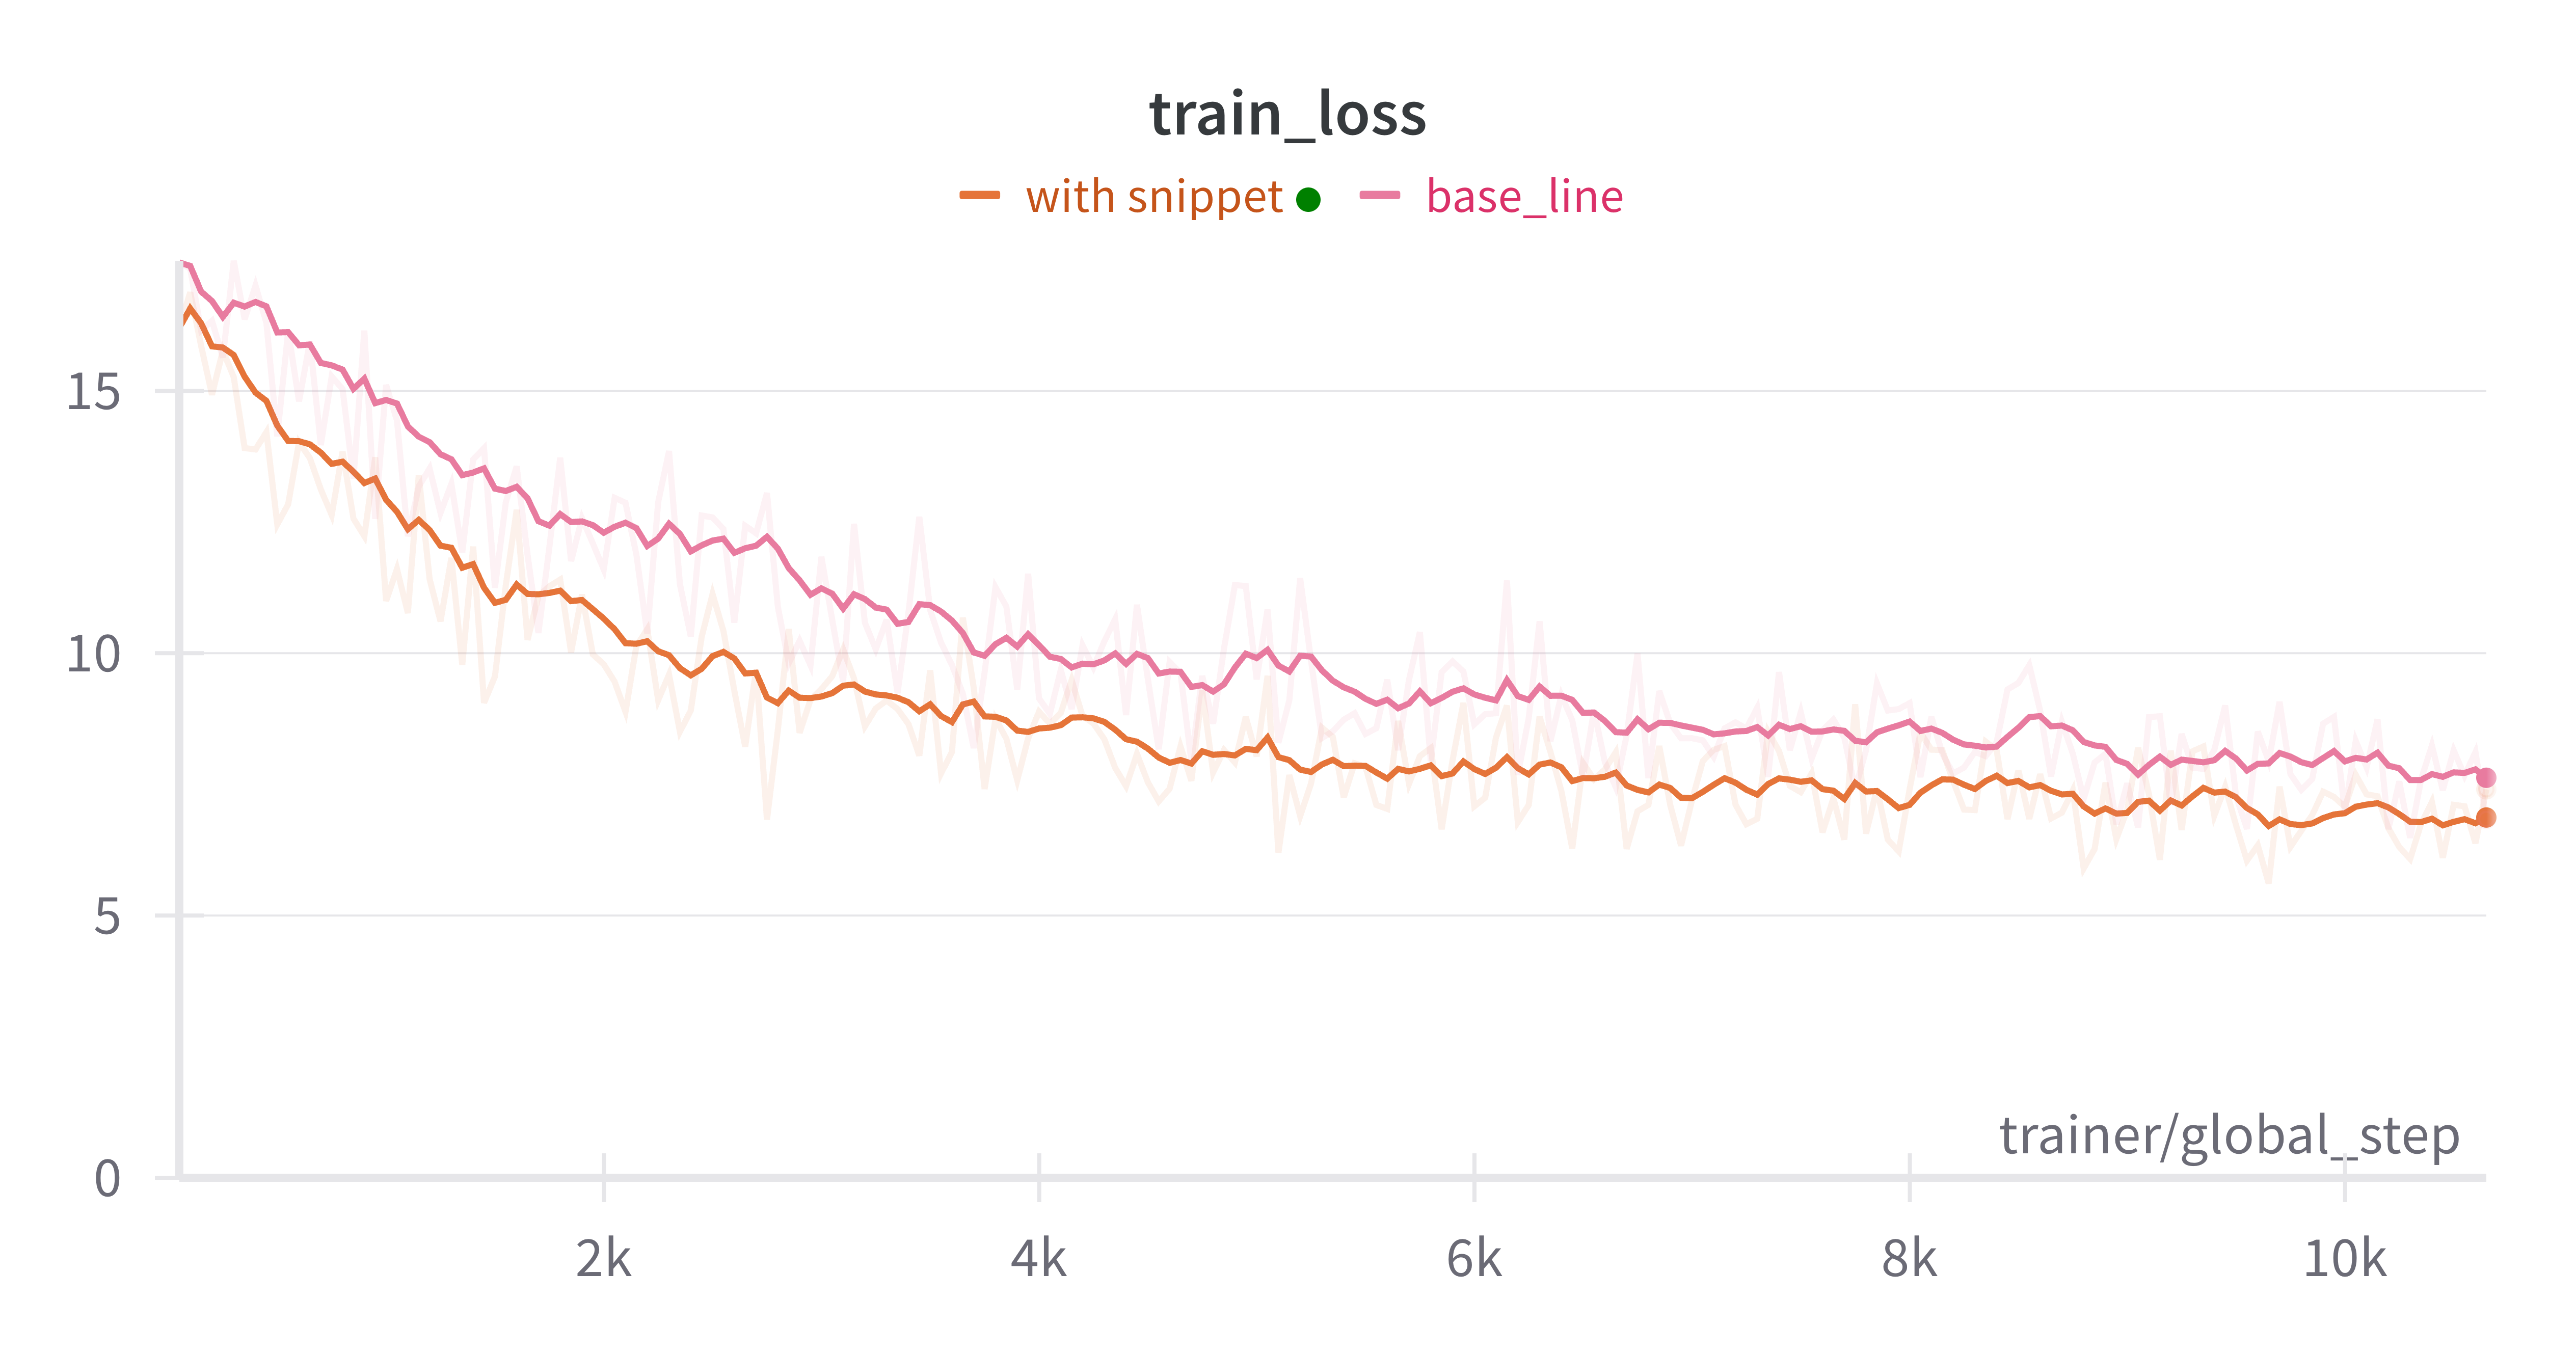

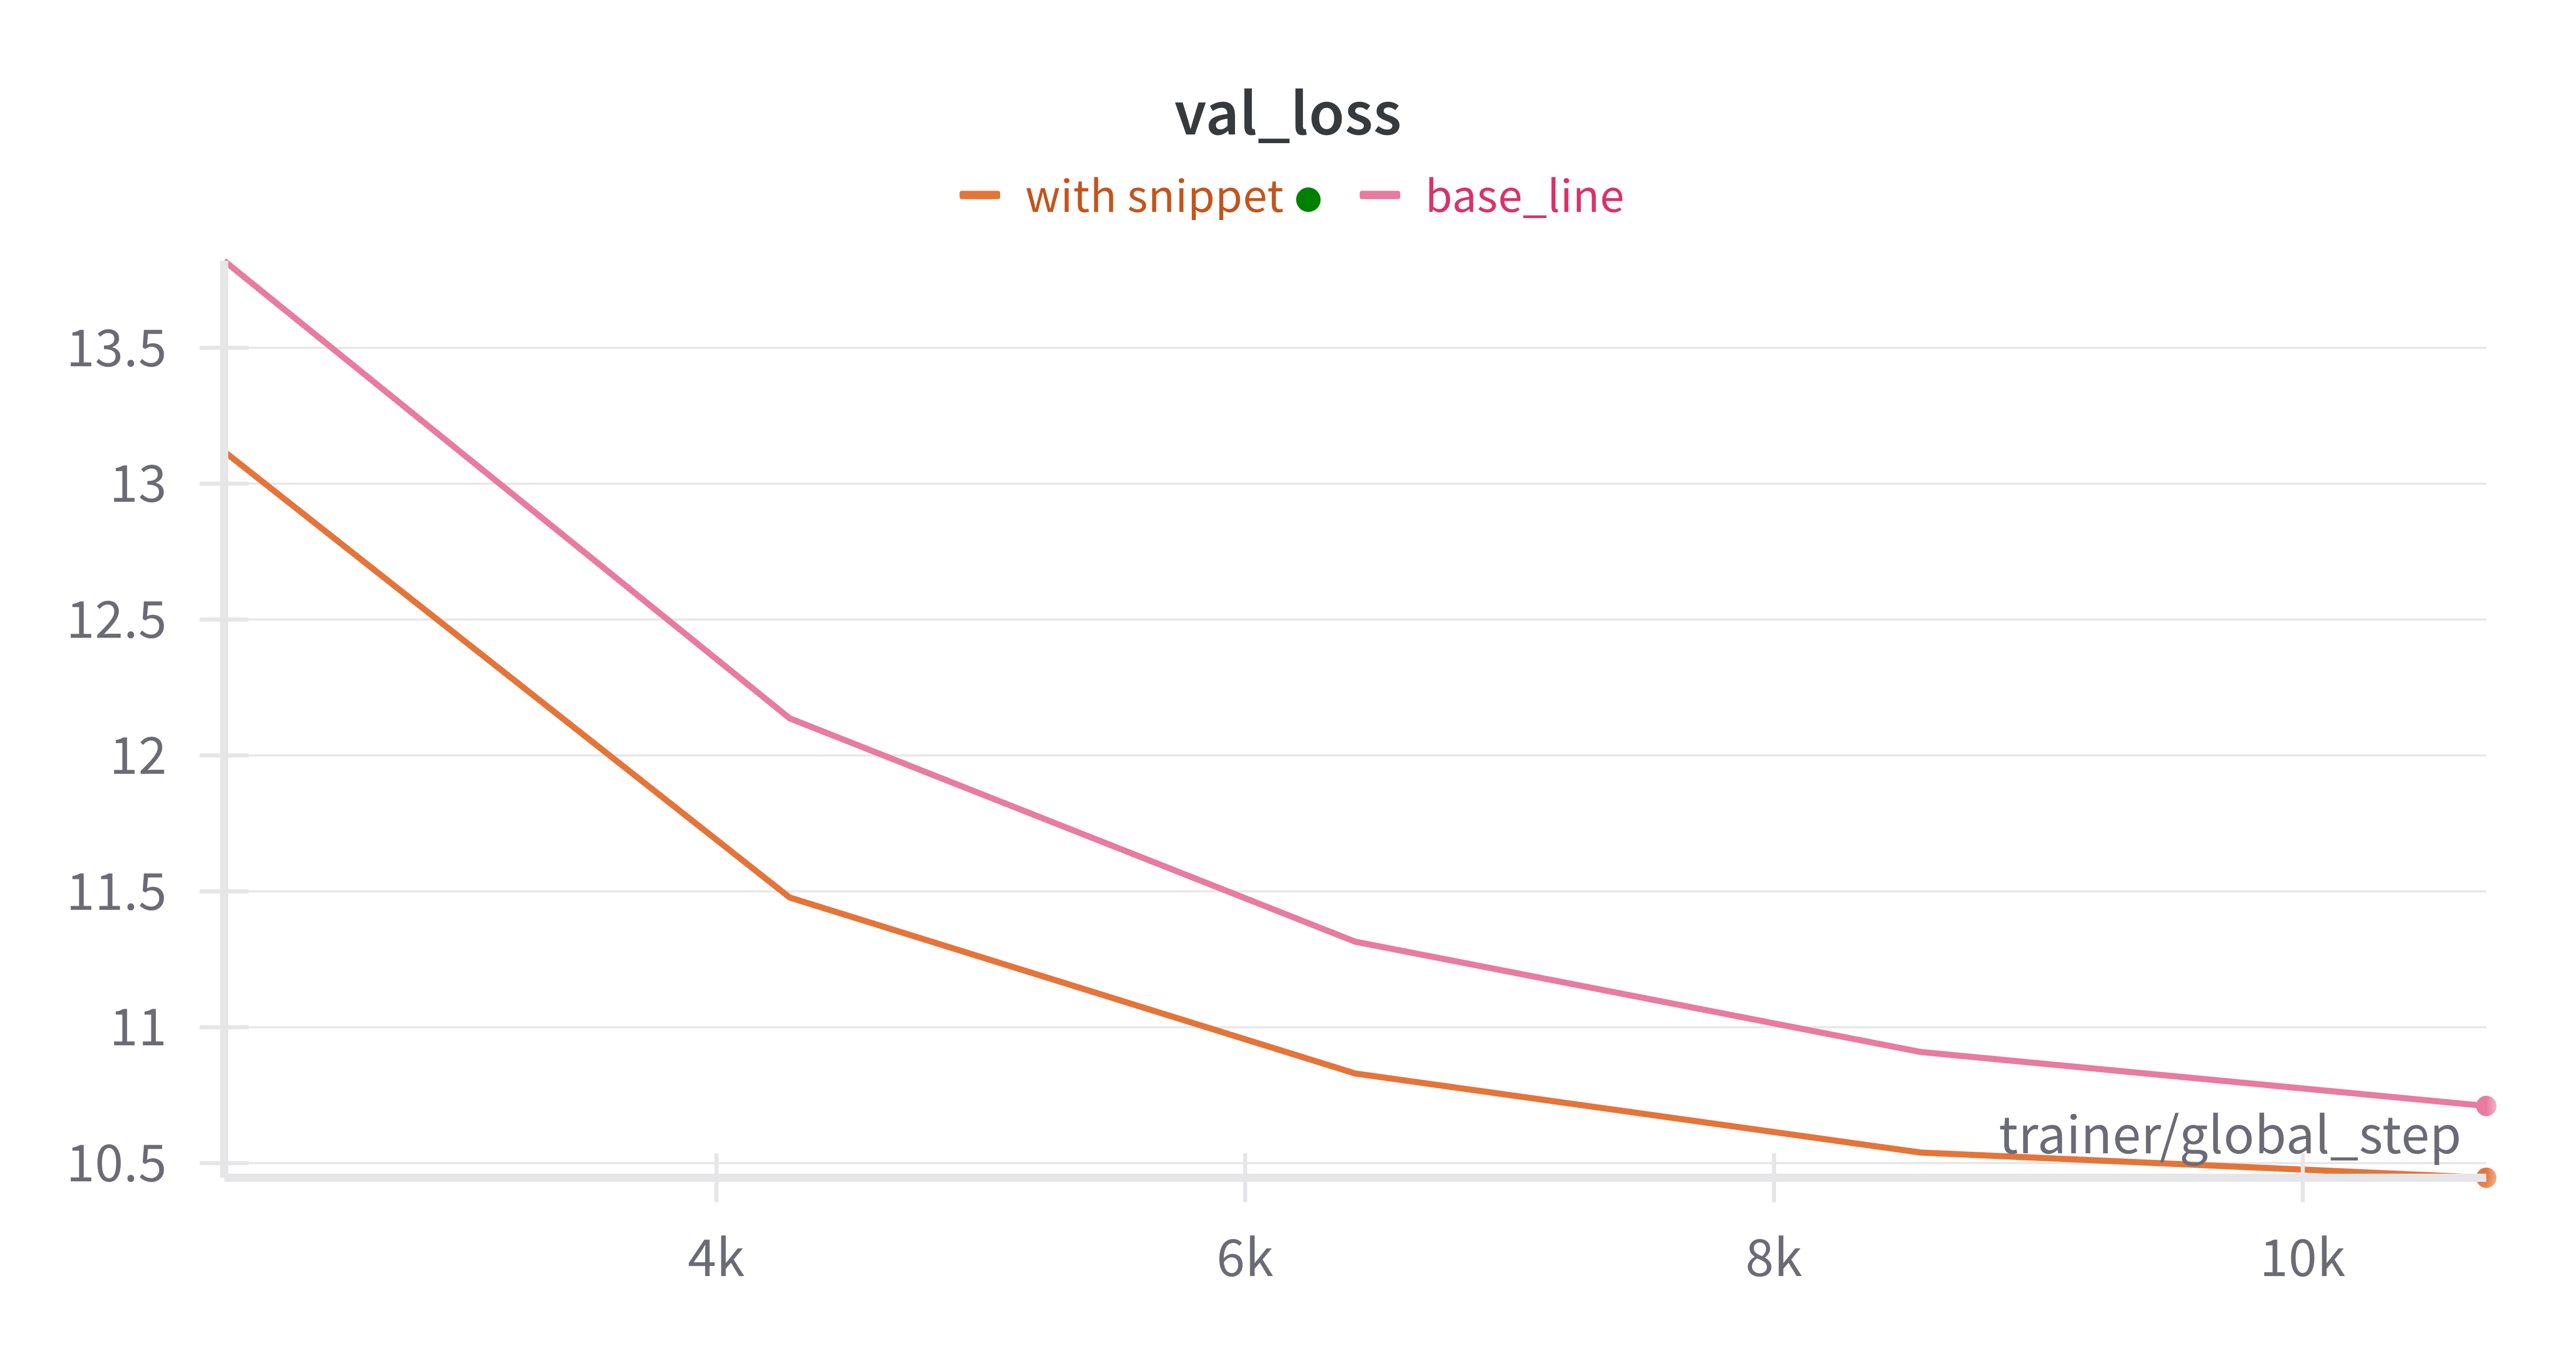

**Инференс и оценка качества моделей**

В данной задаче настоящее значение таргета - множество из тегов $y_i = [tag1, tag2, tag3]$ (для каждой новости надо предсказывать несколько тегов). Прогноз модели - также множество из тегов $\hat y_i = [tag1, tag4]$.

Будем считать метрики качества следующим образом:

$$
Precision = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|\hat{y}_i|}
$$

$$
Recall = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|y_i|}
$$

Также можно считать аналог Accuracy, но это не самая удачная идея, т.к. в выборке много нулей, и эта метрика при любом разумном пороге для принятия решения будет очень высокой.

$$
Exact Match = \frac{1}{n} \cdot \frac{1}{k} \sum_{i = 1}^n \sum_{k=1}^K [y_{ij} = \hat{y}_{ij}]
$$

In [ ]:
def precision(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (y_pred == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def recall(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (target == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def exact_match(target, y_pred):
    return (1.*(y_pred == target)).mean().item()

Построим прогноз на тестовой выборке.

In [ ]:
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())

for title, target in test_dataloader:
    logit = model_baseline(title)
    pred_prob = F.softmax(logit, dim=1)

assert pred_prob.shape[0] == test_dataset.__len__()

Выбирая различное значение порога, можем получать разные предсказания. Если взять очень большое значение порога, то метрики сильно просядут, т.к. во многих документах никакого прогноза не будет построено вообще.

In [ ]:
TRESHOLD = 0.01
y_pred = 1 * (pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9955333471298218
Precision: 0.2911031246185303
Recall: 0.764103889465332


In [ ]:
TRESHOLD = 0.05
y_pred = 1 * (pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9983325004577637
Precision: 0.5219230651855469
Recall: 0.618028461933136


In [ ]:
TRESHOLD = 0.9
y_pred = 1 * (pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9983182549476624
Precision: 0.0057493471540510654
Recall: 0.005233065225183964


**Функция для построения прогнозов**

In [ ]:
def get_predict(model, dataset):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for title, target in dataloader:
        logit = model(title)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

In [ ]:
def get_predict_custom(model, dataset, snippet=False):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    if snippet:
        for title, _snippet, target in dataloader:
            logit = model(title, _snippet)
    else:
        for title, target in dataloader:
            logit = model(title)
    pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

**Реализация функции, которая подбирает оптимальное значение порога, оптимизирующее точность**

Точность в этой задаче важнее, чем полнота, т.к. новостным агенствам, которые дорожат своей репутацией, важно, чтобы текст был правильно протегирован и меньше доносить контента для читателей, который им не интересен (т.о., чтобы не сокращалась аудитория).

In [ ]:
def found_thresh(model, dataset, snippet=False):
    best_thresh = 0
    best_metric = 0
    counter = 0
    thresholds = np.arange(0.01, 1.01, 0.01)
    for idx, thresh in enumerate(thresholds):
        if snippet:
            pred_prob, target = get_predict_custom(model, dataset, snippet=snippet)
        else:
            pred_prob, target = get_predict_custom(model, dataset, snippet=snippet)
        y_pred = 1 * (pred_prob > thresh)
        metric = precision(target, y_pred)
        print(f"Thresh = {thresh:.3f}, Precision = {metric:.3f}")

        if metric > best_metric:
            best_metric = metric
            best_thresh = thresh
            counter = idx

        # если больше трех итераций с последнего обновления нет обновления метрики, то останавливаем поиск порога
        if (idx - counter) >= 3:
            break

    print(f"Best metric = {best_metric:.3f}, Best thresh = {best_thresh:.3f}")

    return best_thresh

In [ ]:
# подбор значения порога на валидационной выборке для модели без сниппетов
found_thresh(model=model_baseline,
             dataset=NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM),
             snippet=False)

Thresh = 0.010, Precision = 0.357
Thresh = 0.020, Precision = 0.486
Thresh = 0.030, Precision = 0.559
Thresh = 0.040, Precision = 0.608
Thresh = 0.050, Precision = 0.643
Thresh = 0.060, Precision = 0.668
Thresh = 0.070, Precision = 0.687
Thresh = 0.080, Precision = 0.700
Thresh = 0.090, Precision = 0.710
Thresh = 0.100, Precision = 0.718
Thresh = 0.110, Precision = 0.723
Thresh = 0.120, Precision = 0.724
Thresh = 0.130, Precision = 0.724
Thresh = 0.140, Precision = 0.723
Thresh = 0.150, Precision = 0.721
Thresh = 0.160, Precision = 0.717
Best metric = 0.724, Best thresh = 0.130


0.13

In [ ]:
# подбор значения порога на валидационной выборке для модели со сниппетами
found_thresh(model=model_custom,
             dataset=NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_val.snippet_clean.values, MAX_SNIPPET_LEN),
             snippet=True)

Thresh = 0.010, Precision = 0.369
Thresh = 0.020, Precision = 0.491
Thresh = 0.030, Precision = 0.562
Thresh = 0.040, Precision = 0.610
Thresh = 0.050, Precision = 0.645
Thresh = 0.060, Precision = 0.673
Thresh = 0.070, Precision = 0.694
Thresh = 0.080, Precision = 0.710
Thresh = 0.090, Precision = 0.722
Thresh = 0.100, Precision = 0.730
Thresh = 0.110, Precision = 0.735
Thresh = 0.120, Precision = 0.738
Thresh = 0.130, Precision = 0.737
Thresh = 0.140, Precision = 0.735
Thresh = 0.150, Precision = 0.731
Best metric = 0.738, Best thresh = 0.120


0.12

**Сравнение модели со сниппетами и модели без сниппетов (по точности) при оптимальном значении порога на тестовой выборке**

In [ ]:
# предикт для base_line

TRESHOLD = 0.13

test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())

pred_prob, target = get_predict_custom(model_baseline, test_dataset, snippet=False)

y_pred = 1 * (pred_prob > TRESHOLD)

print('Precision:', precision(target, y_pred))

Precision: 0.5813579559326172


In [ ]:
# предикт для model_custom

TRESHOLD = 0.12

test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_test.snippet_clean.values, MAX_SNIPPET_LEN)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())

pred_prob, target = get_predict_custom(model_custom, test_dataset, snippet=True)

y_pred = 1 * (pred_prob > TRESHOLD)

print('Precision:', precision(target, y_pred))

Precision: 0.5835338234901428


**Построение прогнозов для отложенной выборки**

In [ ]:
df_oob.head()

,href,title_clean,target_tags
0,/20181231/1548960744.html,митрополит рязанский раскритиковал иронию судьбы,[1149]
1,/20181231/1548958617.html,на украине позавидовали стене на границе с крымом,"[896, 318]"
2,/20181231/1548957394.html,в госдуме предложили отказаться от газа в жилы...,"[1272, 1272, 317, 1001, 1370]"
3,/20181231/1548954909.html,названы лучшие средства от похмелья,[1149]
4,/20181231/1548957120.html,новогоднее поздравление порошенко разозлило по...,"[896, 318]"


In [ ]:
test_dataset = NewsDataset(df_oob.target_tags.values, df_oob.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())

pred_prob, target = get_predict_custom(model_baseline, test_dataset, snippet=False)
y_pred = 1 * (pred_prob > TRESHOLD)

print('Precision:', precision(target, y_pred))

Precision: 0.5525855422019958


**Предсказание категорий для всех новостей из датасета `df_vk` с помощью лучшей модели**

In [ ]:
df_vk['target_tags'] = [[0]] * df_vk.shape[0]

vk_test_dataset = NewsDataset(df_vk.target_tags.values, df_vk.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_vk.snippet_clean.values, MAX_SNIPPET_LEN)

In [ ]:
pred_prob, target = get_predict_custom(model_custom, vk_test_dataset, snippet=True)
predicted_indexes = torch.argmax(pred_prob, dim=1)
predicted_tags = [list(target_tags)[i] for i in predicted_indexes]
df_vk["predicted_tags"] = predicted_tags

df_vk.to_csv("df_vk.csv", index=False) # сохранение данных с предсказаниями